In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Let us view some of the images of **Organic** type

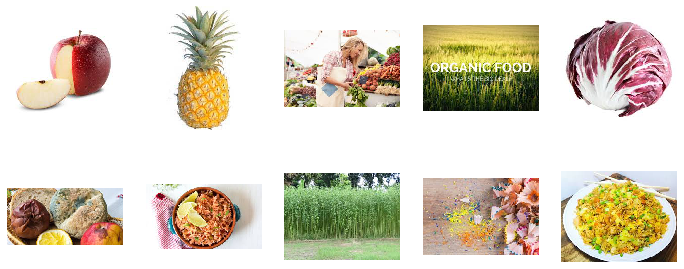

In [2]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_11783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_8583.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/O/O_12000.jpg")
plt.imshow(img)

Let us now view some images of **Recycle** type

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_8589.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

Formation of CNN

In [4]:
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from keras import metrics

Using TensorFlow backend.


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

**OR**

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(90, activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Output

Specifying the optimizers

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

Setting the data directory

In [8]:
train_dir = "F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/"
validation_dir = "F:/Kaggle/Datasets/waste-classification-data/DATASET/TEST/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Fitting the model

In [9]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=2)

Epoch 1/5
100/100 - 66s - loss: 6.7014 - acc: 0.5675 - val_loss: 6.6944 - val_acc: 0.5660
Epoch 2/5
100/100 - 55s - loss: 7.1417 - acc: 0.5419 - val_loss: 6.6944 - val_acc: 0.5660
Epoch 3/5
100/100 - 57s - loss: 6.8641 - acc: 0.5648 - val_loss: 6.6944 - val_acc: 0.5660
Epoch 4/5
100/100 - 54s - loss: 6.7253 - acc: 0.5597 - val_loss: 6.6944 - val_acc: 0.5660
Epoch 5/5
100/100 - 55s - loss: 6.8718 - acc: 0.5521 - val_loss: 6.6944 - val_acc: 0.5660
